In [1]:
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

import pathlib
data_root_orig = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    fname='flower_photos', untar=True
)
data_root = pathlib.Path(data_root_orig)


228818944/228813984 [==============================] - 20s 0us/step


In [2]:
print(data_root)

/home/ma/.keras/datasets/flower_photos


In [3]:
for item in data_root.iterdir():
    print(item)


/home/ma/.keras/datasets/flower_photos/LICENSE.txt
/home/ma/.keras/datasets/flower_photos/roses
/home/ma/.keras/datasets/flower_photos/daisy
/home/ma/.keras/datasets/flower_photos/dandelion
/home/ma/.keras/datasets/flower_photos/tulips
/home/ma/.keras/datasets/flower_photos/sunflowers


In [4]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)


In [5]:
image_count

3670

In [6]:
all_image_paths[:10]


['/home/ma/.keras/datasets/flower_photos/daisy/10841136265_af473efc60.jpg',
 '/home/ma/.keras/datasets/flower_photos/daisy/14088053307_1a13a0bf91_n.jpg',
 '/home/ma/.keras/datasets/flower_photos/sunflowers/3311874685_7b9ef10f7e_m.jpg',
 '/home/ma/.keras/datasets/flower_photos/sunflowers/7652532108_01ef94c476.jpg',
 '/home/ma/.keras/datasets/flower_photos/dandelion/7132677385_bcbdcc6001.jpg',
 '/home/ma/.keras/datasets/flower_photos/sunflowers/4932736136_0115955987.jpg',
 '/home/ma/.keras/datasets/flower_photos/dandelion/506660896_c903cca1f0.jpg',
 '/home/ma/.keras/datasets/flower_photos/daisy/286875003_f7c0e1882d.jpg',
 '/home/ma/.keras/datasets/flower_photos/dandelion/13968424321_1d89b33a9f_n.jpg',
 '/home/ma/.keras/datasets/flower_photos/sunflowers/24459548_27a783feda.jpg']

In [9]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]


In [11]:
attributions = dict(attributions)


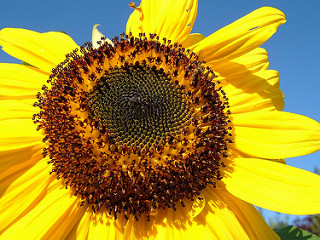

Image (CC BY 2.0)  by Karen Roe



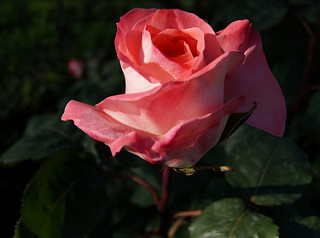

Image (CC BY 2.0)  by Teresa Grau Ros



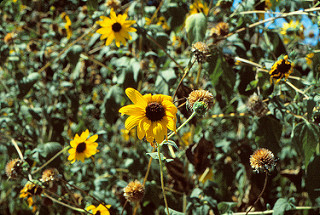

Image (CC BY 2.0)  by David Prasad



In [13]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + '-'.join(attributions[str(image_rel)].split(' - ')[:-1])

for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()







